# **Let's revisit Machine Learning!**
### Greates recap of all time!
Let's implement and explain most popular ML algorithms from scratch!
I hope it's gonna be ez<br> after learning Transformer architecture and GPT<br>
<img src="https://i.ibb.co/TqW6x7f/MEME.jpg" width=40%>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **Let's start with a Linear Regression!**
#### **Explanation**
Linear regression - simplest regression method I guess..<br>
It fits the data by learning slope and y-intercept of simple linear function.<br>
As in any other algorithm we use Gradient Descent for parameter tuning.<br>
In the following code:<br>
- lr - learning rate (controls speed of convergance)<br>
- cost - error score of model (the lower the better)<br>
- dw, db - partial derivatives of cost function w.r.t parameters (weights and bias respecitvely)<br>

---
specs:<br>
loss - mse<br>
optimizer - gradient descent<br>

In [127]:
class LinearRegression:
  def __init__(self):
    self.weights = None
    self.bias = 0

  def fit(self, X, y, n=100, lr=0.1, verbose=10):
    y = y.reshape(-1, 1)
    # weights initialization to zeros (runs once)
    self.m_samples, n_feats = X.shape
    self.weights = np.zeros((n_feats, 1))
    # training
    for iter in range(n):
      # prediction + feedback
      prediction = self.pred(X)
      cost = self.cost_fn(y, prediction)
      if iter % verbose == 0:
        print(f"Iteration: {iter} | Loss: {cost}")
      # update
      dw = 1 / self.m_samples * np.dot(X.T, (prediction - y))
      db = 1 / self.m_samples * np.sum((prediction - y))
      self.weights -= lr * dw
      self.bias -= lr * db

    return self.weights, self.bias

  def pred(self, X):
    return (np.dot(X, self.weights) + self.bias).reshape(-1, 1)

  def cost_fn(self, y, y_pred):
    # mean squared error used
    return 1 / self.m_samples * np.sum((y - y_pred) ** 2)

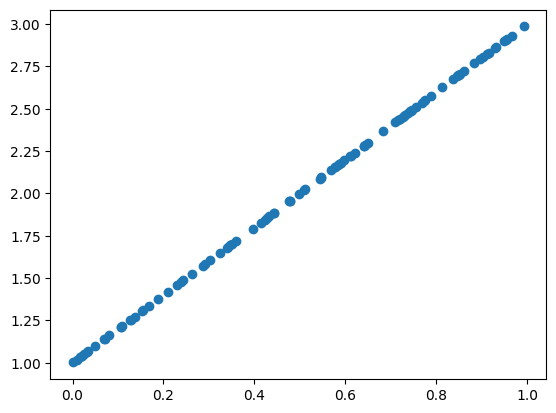

In [128]:
# generate dataset
xs = np.random.random((100, 1))
ys = xs * 2 + 1  # our w=2 and b=1


plt.scatter(xs, ys);

In [129]:
model = LinearRegression()
w, b = model.fit(xs, ys, n=500, verbose=50)
print(w, b)

Iteration: 0 | Loss: 4.415550149809859
Iteration: 50 | Loss: 0.05569852625743073
Iteration: 100 | Loss: 0.028494751400681088
Iteration: 150 | Loss: 0.014578901371999698
Iteration: 200 | Loss: 0.007459070699321986
Iteration: 250 | Loss: 0.0038163188211384476
Iteration: 300 | Loss: 0.0019525608392342339
Iteration: 350 | Loss: 0.0009989977278087611
Iteration: 400 | Loss: 0.0005111218253042828
Iteration: 450 | Loss: 0.00026150762211982626
[[1.96071125]] 1.021438776004958


In [130]:
xp = np.linspace(0, 1, 100).reshape(-1, 1)
yp = model.pred(xp)

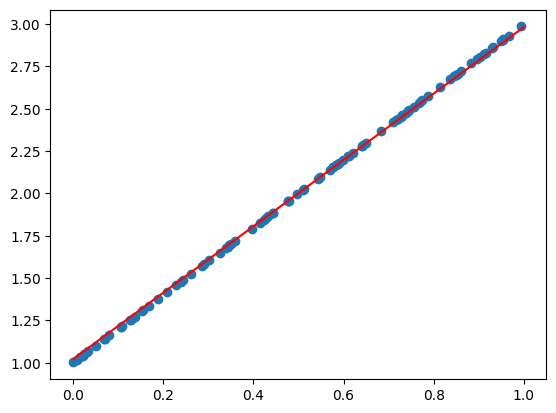

In [131]:
plt.scatter(xs, ys)
plt.plot(xp, yp, c="red");

## **I guess we're good here!**<br>
<p align="center"><img src="https://i.pinimg.com/originals/70/ea/e4/70eae4f80934ec4949fe3dc64426f0d8.jpg" width=30%></p>

### **Now Let's classify things with Logistic Regression!**


In [155]:
class LogisticRegression:
  def __init__(self):
    self.weights = None
    self.bias = 0

  def fit(self, X, y, n=100, lr=0.1, verbose=10):
    y = y.reshape(-1, 1)
    self.m_samples, n_features = X.shape
    self.weights = np.zeros((n_features, 1))

    for iter in range(n):
      prediction = self.pred(X)
      cost = self.cost_fn(y, prediction)
      if iter % verbose == 0:
        print(cost)
      # update
      dw = 1 / self.m_samples * np.dot(X.T, (prediction - y))
      db = 1 / self.m_samples * np.sum(prediction - y)
      self.weights -= lr * dw
      self.bias -= lr * db
    return self.weights, self.bias

  def pred(self, X):
    return self.sigmoid(np.dot(X, self.weights) + self.bias)

  def cost_fn(self, y, y_pred):
    a = y * np.log(y_pred + 1e-7)
    b = (1 - y) * np.log(1 - y_pred + 1e-7)

    return np.mean(a - b, axis=0)

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

In [156]:
xs = np.linspace(0, 1, 100).reshape(-1, 1)
ys = xs > 0.5
print(xs.shape, ys.shape)

(100, 1) (100, 1)


In [160]:
model = LogisticRegression()
w, b = model.fit(xs, ys, n=500, verbose=50)

[5.55111512e-17]
[0.070754]
[0.07540697]
[0.06941103]
[0.0626319]
[0.05666856]
[0.0516227]
[0.0473567]
[0.04372328]
[0.04060118]


In [169]:
preds = np.round(model.pred(xs))

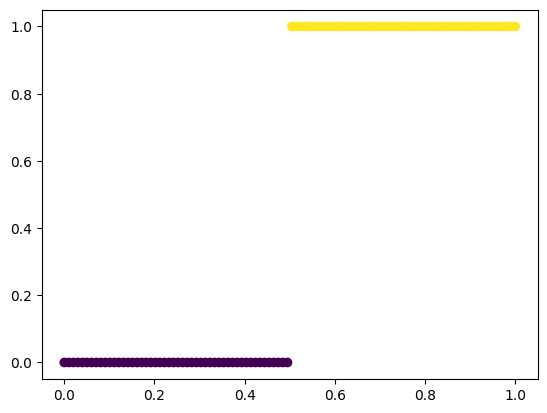

In [171]:
plt.scatter(xs, ys, c=ys);

0.54


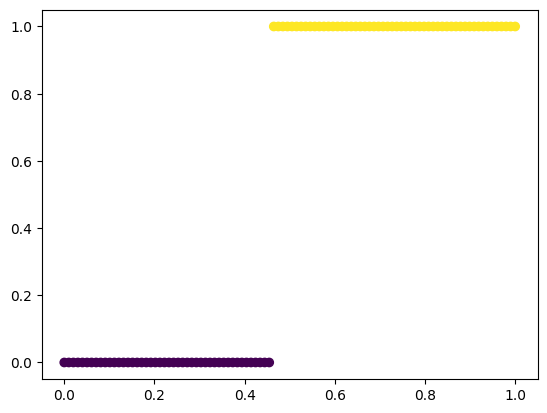

In [174]:
print(np.mean(preds))  # model predicted a bit more positives, but it's ok
plt.scatter(xs, preds, c=preds);